<a href="https://colab.research.google.com/github/COGS118A/Group002-Sp22/blob/main/Checkpoint_group002_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Very Abnormal Chess Analysis - COGS118A Project

# Names
- Aryaman "The Audacity" Sinha
- Bridget "Birds" Egan
- John "Ya Like Jazz?" Pyjar
- Alex "Apache Server" Tyler


# Abstract

**Using a dataset of thousands of chess games, with data including opening move, length of book-approved opening sequence, elo rating of both players, game outcome, and time of the game, we hope to predict the number of turns in a game of chess. Primarily, we will conduct the relevant data wrangling, build a model that will use the previously stated factors to predict game turns using a linear regression model, and then perform some tweaking of the model to improve its outcome. Since we are doing a prediction of continous numbers and not categories, we are going to measure success by doing a training set, test set, and validation set, and scoring our model by how far away it is. Finally, we can create games of our own, and test our algorithm on data that we create with our own chess games.** 

# Background

Chess has debatably been the single most popular test subject for the fields of machine learning and artificial intelligence. The game famously put AI on the map with IBM's "Deep Blue" program that managed to best the world champion Garry Kasparov in 1997. And as ML techniques have become more sophisticated and chess has gotten digitized, ML engineers of course keep returning to chess to create more algorithms for the game.

Lichess is one of the most popular online chess websites and our dataset is from games played on it. The most common metric used in chess to rate players is the ELO rating which is based on a relative scale
<a name="elo"></a>[<sup>[1]</sup>](#cite_note-1). Lichess uses a slightly modified version of the official FIDE ELO system wherein the median rating is 1500 so any new account starts off at that rating<a name="elo2"></a>[<sup>[2]</sup>](#cite_note-2). 
An opening in a chess game is defined as the phase where the initial moves are made. Usually the position on the board after the first 2-4 moves has been studied extensively and is considered theory. Each such opening has a name which is one of the features of the dataset. The data also features the number of turns the opening lasted. Exactly defining where the opening phase ends is a matter of subjectivity but the way the dataset quantifies this is by considering the first "out of theory" or "non-book" move as the end of the opening. 
Modern chess is almost always played with time constraints. A 10+3 time constraint implies that each player gets 10 minutes to make all their moves and at the end of each turn they get an additional 3 seconds. Running out of time is one of 4 ways to end a chess game along with Resignation(which is where the losing player forfeits the game), Checkmate(duh), and a Draw.

Most of the prior AI work in the chess field is targetted towards building better engines that can find the best move in a position and also quantifiably analyzing the position on the board<a name="3"></a>[<sup>[3]</sup>](#cite_note-3). There are some prediction models for the outcome of a game<a name="4"></a>[<sup>[4]</sup>](#cite_note-4)  but not much well-documented research into the number of turns a game lasts.

# Data

The dataset that we plan on using can be obtained [here](https://www.kaggle.com/datasets/datasnaek/chess). This Chess dataset features over 20,000 different chess games collected from the website [lichess.org](https://lichess.org/). There are a total of 16 different variables in the dataset, with most being relevant to understanding a game of chess and its outcome. Each observation in the dataset is a single game of chess, containing the outcome along with important information such as what type of opening was performed, the length of the match, and the number of turns just to name a few. As of right now, we do not envision any special handling or cleaning that will be needed for the dataset. This is obviously subject to change once we start working with the set, but for right now we are planning on doing standard cleaning (such as dropping non-significant columns).

# Proposed Solution and Evaluation Metrics

**Proposed Solution**

Given the continuous nature of the predicted value, our project will be using a linear regression model and a KNN approach. We are going to vectorize the opening data by one-hot encoding the strings of the 30 most common openings. Using those, and the numerical data of the other features, we will perform lineear regression for the continuous data, and then categorize the continuous data into increments of 5 to use KNN to see which performs better. We will use $R^{2}$ error to see how well our model performs for the linear regression. There doesn't appear to be a "standard" model we can directly reference our model with - many have tackled predicting the outcomes of chess games or what the most optimal moves are for given situations, but the inputs and outputs of our prediction goal are unique to this project.

**Evaluation Metrics**

Given the way we are setting up the data to be learned from (splitting a random portion to be assigned to training and test data), we are going to be evaluating the data on how well it does compared to the test data. For linear regression, our evaluation metric will $R^2$. For the k nearest neighbors, we will compare the amount of correct labels to incorrect labels. Although as we delve deeper into the data and start working on our models, we may decide to use different metrics that suit our use case better, but this is what we are planning on for now.

In [ ]:
import pandas as pd
import numpy as np

# Exploratory Data Analysis & Cleaning

In [ ]:
all_games = pd.read_csv('https://github.com/COGS118A/Group002-Sp22/raw/main/games.csv')

In [ ]:
all_games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [ ]:
all_games.columns, all_games.shape

(Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
        'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
        'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
       dtype='object'), (20058, 16))

In [ ]:
all_games['turns'].max(), all_games['turns'].min(), all_games['turns'].mean()

(349, 1, 60.46599860404826)

In [ ]:
#begin data cleaning, get rid of unnecessary columns
games = all_games.drop(['created_at',	'last_move_at',	'opening_name', 'white_id', 'black_id', 'moves'], axis=1)
games['rating_difference'] = games['white_rating'] - games['black_rating']
games.head()


,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,rating_difference
0,TZJHLljE,False,13,outoftime,white,15+2,1500,1191,D10,5,309
1,l1NXvwaE,True,16,resign,black,5+10,1322,1261,B00,4,61
2,mIICvQHh,True,61,mate,white,5+10,1496,1500,C20,3,-4
3,kWKvrqYL,True,61,mate,white,20+0,1439,1454,D02,3,-15
4,9tXo1AUZ,True,95,mate,white,30+3,1523,1469,C41,5,54


In [ ]:
games['increment_code'].value_counts()

10+0     7721
15+0     1311
15+15     850
5+5       738
5+8       697
         ... 
14+9        1
0+20        1
0+40        1
13+20       1
14+15       1
Name: increment_code, Length: 400, dtype: int64

The increment code describes the type of game being played. For example, a 10+5 game gives 10 minutes for each player, and each move they take gives them 5 seconds back. Some of these are custom games, so we are going to remove the ones with less than 50 occurances, so we don't need to do 400 one-hots. 

In [ ]:
v = games.increment_code.value_counts()
games = games[games.increment_code.isin(v.index[v.gt(20)])]
games['increment_code'].value_counts()

10+0     7721
15+0     1311
15+15     850
5+5       738
5+8       697
         ... 
16+0       22
6+6        22
20+30      21
10+30      21
13+0       21
Name: increment_code, Length: 82, dtype: int64

In [ ]:
games

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,rating_difference
0,TZJHLljE,False,13,outoftime,white,15+2,1500,1191,D10,5,309
1,l1NXvwaE,True,16,resign,black,5+10,1322,1261,B00,4,61
2,mIICvQHh,True,61,mate,white,5+10,1496,1500,C20,3,-4
3,kWKvrqYL,True,61,mate,white,20+0,1439,1454,D02,3,-15
5,MsoDV9wj,False,5,draw,draw,10+0,1250,1002,B27,4,248
...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,24,resign,white,10+10,1691,1220,A80,2,471
20054,WSJDhbPl,True,82,mate,black,10+0,1233,1196,A41,2,37
20055,yrAas0Kj,True,35,mate,white,10+0,1219,1286,D00,3,-67
20056,b0v4tRyF,True,109,resign,white,10+0,1360,1227,B07,4,133


Also the amount of openings is a lot, and some are very rare, so we will do the same thing we did with the increment codes. By making the occurance threshold 10, we half the amount of ecos to look at. 

In [ ]:
games['opening_eco'].value_counts()

A00    899
C00    790
D00    684
B01    668
C41    630
      ... 
A67      1
D95      1
A99      1
D22      1
D19      1
Name: opening_eco, Length: 361, dtype: int64

In [ ]:
v = games.opening_eco.value_counts()
games = games[games.opening_eco.isin(v.index[v.gt(5)])]

In [ ]:
games['opening_eco'].value_counts()

A00    899
C00    790
D00    684
B01    668
C41    630
      ... 
E34      6
D41      6
C72      6
B93      6
C06      6
Name: opening_eco, Length: 224, dtype: int64

Now we will bianrize the rated column. 

In [ ]:
games['rated'] = games['rated'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
games

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,rating_difference
0,TZJHLljE,0,13,outoftime,white,15+2,1500,1191,D10,5,309
1,l1NXvwaE,1,16,resign,black,5+10,1322,1261,B00,4,61
2,mIICvQHh,1,61,mate,white,5+10,1496,1500,C20,3,-4
3,kWKvrqYL,1,61,mate,white,20+0,1439,1454,D02,3,-15
5,MsoDV9wj,0,5,draw,draw,10+0,1250,1002,B27,4,248
...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,1,24,resign,white,10+10,1691,1220,A80,2,471
20054,WSJDhbPl,1,82,mate,black,10+0,1233,1196,A41,2,37
20055,yrAas0Kj,1,35,mate,white,10+0,1219,1286,D00,3,-67
20056,b0v4tRyF,1,109,resign,white,10+0,1360,1227,B07,4,133


Now we must one-hot encode, for it is the way. We will encode the victory status, winner, increment code, and the opening eco, which represents the regulated code for what opening was played. 

In [ ]:
len(games['victory_status'].value_counts()), len(games['winner'].value_counts()), len(games['increment_code'].value_counts()), len(games['opening_eco'].value_counts())

(4, 3, 82, 224)

But it seems like there are a lot of openings. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

vict_dummies = pd.get_dummies(games.victory_status)
winn_dummies = pd.get_dummies(games.winner)
incr_dummies = pd.get_dummies(games.increment_code)
open_dummies = pd.get_dummies(games.opening_eco)
games = pd.concat([games, vict_dummies], axis=1)
games = pd.concat([games, winn_dummies], axis=1)
games = pd.concat([games, incr_dummies], axis=1)
games = pd.concat([games, open_dummies], axis=1)

games

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,...,E34,E60,E61,E70,E76,E77,E80,E81,E90,E91
0,TZJHLljE,0,13,outoftime,white,15+2,1500,1191,D10,5,...,0,0,0,0,0,0,0,0,0,0
1,l1NXvwaE,1,16,resign,black,5+10,1322,1261,B00,4,...,0,0,0,0,0,0,0,0,0,0
2,mIICvQHh,1,61,mate,white,5+10,1496,1500,C20,3,...,0,0,0,0,0,0,0,0,0,0
3,kWKvrqYL,1,61,mate,white,20+0,1439,1454,D02,3,...,0,0,0,0,0,0,0,0,0,0
5,MsoDV9wj,0,5,draw,draw,10+0,1250,1002,B27,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,1,24,resign,white,10+10,1691,1220,A80,2,...,0,0,0,0,0,0,0,0,0,0
20054,WSJDhbPl,1,82,mate,black,10+0,1233,1196,A41,2,...,0,0,0,0,0,0,0,0,0,0
20055,yrAas0Kj,1,35,mate,white,10+0,1219,1286,D00,3,...,0,0,0,0,0,0,0,0,0,0
20056,b0v4tRyF,1,109,resign,white,10+0,1360,1227,B07,4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
games['white_rating'].value_counts()

1500    710
1480     49
1400     45
1708     45
1536     45
       ... 
2298      1
2248      1
2430      1
974       1
880       1
Name: white_rating, Length: 1481, dtype: int64

Now we can visualize the data to see what features have correlation. Firsly, the white and black ratings should be 

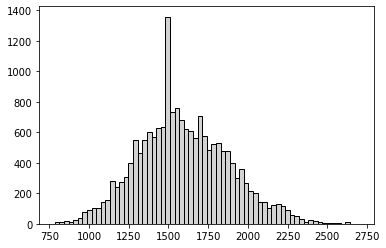

In [ ]:
plt.hist(games['white_rating'], edgecolor='black', bins = 66, color = 'lightgrey');

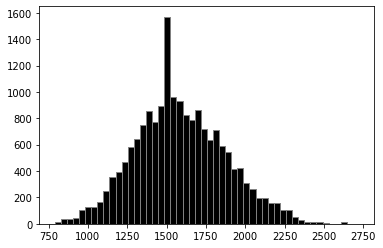

In [ ]:
plt.hist(games['black_rating'], edgecolor='grey', bins = 50, color = 'black');

The large bump at 1500 represents the default score of a chess.com player. When a person makes an account, their elo is set to 1500. Their elo stays at 1500 into the player has played 10 games, so any player at 1500 is not a good representat 0f their elo. 

it seems like the 1500 ratings are skewing the data. 

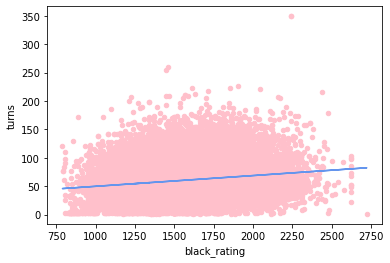

In [ ]:
x = games['black_rating']
y = games['turns']
games.plot.scatter(x = 'black_rating', y = 'turns', color = 'pink')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), color = 'cornflowerblue');

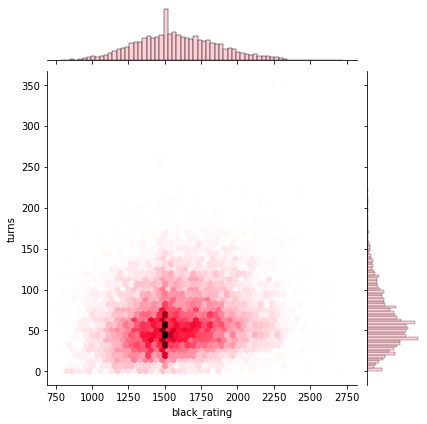

In [ ]:
import seaborn as sns
sns.jointplot(x=x, y=y, kind='hex', color= 'pink')
plt.show()

In [ ]:
games = games[games.black_rating != 1500]
games = games[games.white_rating != 1500]
games

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,...,E34,E60,E61,E70,E76,E77,E80,E81,E90,E91
1,l1NXvwaE,1,16,resign,black,5+10,1322,1261,B00,4,...,0,0,0,0,0,0,0,0,0,0
3,kWKvrqYL,1,61,mate,white,20+0,1439,1454,D02,3,...,0,0,0,0,0,0,0,0,0,0
5,MsoDV9wj,0,5,draw,draw,10+0,1250,1002,B27,4,...,0,0,0,0,0,0,0,0,0,0
6,qwU9rasv,1,33,resign,white,10+0,1520,1423,D00,10,...,0,0,0,0,0,0,0,0,0,0
8,dwF3DJHO,1,66,resign,black,15+0,1439,1392,C50,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,1,24,resign,white,10+10,1691,1220,A80,2,...,0,0,0,0,0,0,0,0,0,0
20054,WSJDhbPl,1,82,mate,black,10+0,1233,1196,A41,2,...,0,0,0,0,0,0,0,0,0,0
20055,yrAas0Kj,1,35,mate,white,10+0,1219,1286,D00,3,...,0,0,0,0,0,0,0,0,0,0
20056,b0v4tRyF,1,109,resign,white,10+0,1360,1227,B07,4,...,0,0,0,0,0,0,0,0,0,0


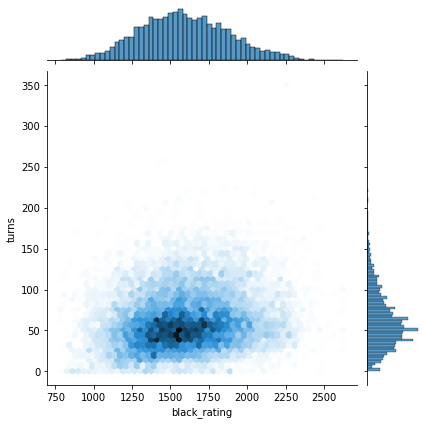

In [ ]:
x=games['black_rating']
sns.jointplot(x=x,y=y, kind='hex');

# Regression
Now that we have done some basic EDA on the dataset, let's get some basic regression going to see how our data correlates. Since we have over 16,000 entries in our dataset, a good place to start with splitting our data would be doing a train/test split.

In [ ]:
# Look how much data we are working with
games.shape

(16931, 324)

In [ ]:
from sklearn.model_selection import train_test_split
X = games[['white_rating']]
y = games['turns']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

Now that we have randomly split our data into a training and test set, it's time to do some linear regression. To start we will use the standard SciKit Learn implementation.

Mean squared error: 1119.49
Coefficient of determination: 0.02


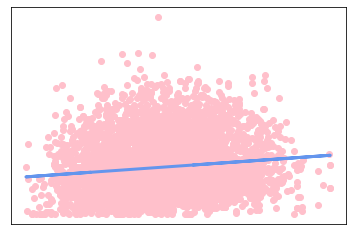

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color="pink")
plt.plot(X_test, y_pred, color="cornflowerblue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Now that we've seen how black_rating performed in terms of turns, let's check out how white_rating looks.




In [ ]:
X = games[['white_rating']]
y = games['turns']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

Mean squared error: 1119.49
Coefficient of determination: 0.02


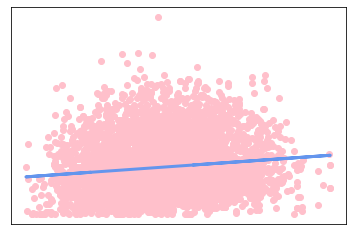

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color="pink")
plt.plot(X_test, y_pred, color="cornflowerblue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

It appears that white_rating has a similar regression to black_ratings. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Messing around with random forests

X = games.iloc[:, 18:]
y = games.iloc[:, 11:18]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1)
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.21492483894058698


# Preliminary results

- Though our initial regression is based solely on the matched elo of one of the players of each game, we will do pipelining to perform regression on more of the features, particularly the one hot encoding done by the wonderful and amazing Bridget.

- We've noticed no significant difference in game length between white and black wins, so we may not include two separate analyses.

- We still have lots of work to do in regards to validation.

# Ethics & Privacy

One potential privacy issue with this project lies in the way the data is collected. This is true for all web-scrape type data, but we essentially use harvested user data, complete with usernames and other user information, from which the users have not explicitly agreed to our (or any other programmer's) direct usage of, apart from the general agreements of Lichess's Terms of Service. These data entries include a data and time for each and every game played, so it is a little troubling that we have (reductively) a record of what these players were doing at a given time on a given day.
  
  It should also be noted that the majority of new-age chess players learn by playing different AI chess "bots". The implication of this is that whatever outcomes these programs find preferable directly influence what the most common options will be for real human chess players. Whether this fact is unethical in itself is up for debate, but it's undeniable that AI programs have computationalized and flow-charted the game of chess pretty irreversibly.

# Team Expectations

* Have a learner's mindset.
* Have a mentor's mindset.
* If another team member's work depends on the completion of yours, finish your portion 5 days to a week before the checkpoint is due.
* All decisions must be unanimous. (There's only 4 of us, so.)
* Attend all meetings, and if you can't, get filled in later.

# Project Timeline Proposal

"*No battle plan survives contact with the enemy"*, *but you need a battle plan nonetheless.*


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/13 |  8 PM |  Brainstorm topics/questions  | Determine best form of communication; Look through datasets and topics in a group brainstorm | 
| 4/19 |  8 PM |  Look into ideal topics  | Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 4/23 |  11 PM | Be done with Project Proposal  | By discord-assigned sections, turn in| 
| 5/12  | 8 PM  | Have worked on sections of checkpoint extensively  | Discuss possible conflicting elements of members' work, ask questions, finalize the checkpoint   |
| 5/24  | 8 PM  | Import & Wrangle Data ,do some EDA| Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 6/2 | 8 PM  | Finalize wrangling/EDA; Any work that later steps are dependent on must be completed.| Discuss/edit project code, ask questions.  |
| 6/6 | 8 PM  | Complete analysis; Draft results/conclusion/discussion| Discuss/edit full project |
| 6/8  | Before 11:59 PM  | Everything | Turn in Final Project  |

# Footnotes
<a name="elo"></a>1.[^](#lorenz): ELO Rating Chess. https://www.chess.com/terms/elo-rating-chess<br> 
<a name="elo2"></a>2.[^](#admonish): Lichess rating system. https://lichess.org/page/rating-systems#:~:text=Lichess%20ratings%20start%20at%201500,as%20FIDE%20or%20chess.com.<br>
<a name="research"></a>3.[^](#sota): Chess Research: https://towardsdatascience.com/predicting-professional-players-chess-moves-with-deep-learning-9de6e305109e<br>
<a name="4"></a>4.[^](#sota): Outcome of a game: https://cs229.stanford.edu/proj2013/FanKuangLin-ChessGameResultPredictionSystem.pdf


# Checkpoint comments

**Q:** First thing I'd ask is why are you doing this? What is the purpose? What does this solve?

**A:** The most direct use of predicting the length of a chess game is for tournament scheduling. High profile online chess tournaments are often streamed and operate within some sort of predetermined schedule, whether that be a timed block of a greater event or a required number of advertisement breaks during downtime. Being able to accurately predict the length of a game in real time would make it easier for tournament organizers to accomodate the needs of their sponsors, balancing streamed match time with advertisement time.

**Q:** I think one thing that could make this more interesting AND useful, is to remove the "game outcome" as a dependent variable so that your model can be utilized in live time, before a game is finished.

**A:** We think that including outcome as a dependent variable for predictions is important, as we could run seperate predictions for remaining turns given white wins and remaining turns given black wins as a secondary step.

**Q:** I strongly suggest you add another model, such as random forests. Are you using KNN regression? The KNN we taught in this class was for classification but this is a regression problem.

**A:** You're right, we will likely change this soon.

**Q:** I strongly suggest you add another model, such as random forests. Are you using KNN regression? The KNN we taught in this class was for classification but this is a regression problem.

**A:** Good idea, we're including random forest as another metric to compare now. And no, we're not using KNN for this regression.


In [ ]:
""